# News Mood - Distinguishing Sentiments

!pip install tweepy

In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "QKgn6njuGSOLWK1hgBLFvRSmT"
consumer_secret = "W81c1NrGsF2ZS3EKjqLBFW9pEswdoxjA3Xb6JzV4YK7ytmDln9"
access_token = "115752339-YSjcEfJr2FketAuVWuNJEmNV6XNxanP8KuVA9clZ"
access_token_secret = "SmkUm9quhjuIxEu3NP7cY8YhEqpPEblx6Dj2kzw7nEwkl"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term
target_terms = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]

# Array to hold sentiment
sentiment_array = []
counter = 1


In [3]:
# Loop through each Term
for terms in target_terms:
    public_tweets = api.user_timeline(terms, count=100)
    tweetnumber = 1       
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        sentiment_array.append({"Media Source": terms,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetnumber})
        tweetnumber +=1
        counter +=1


s://t.co/zGnsbWg0ib
Tweet 355: wow, all of these hot startups are horrible at customer support. like, not even faking trying to be helpful. close… https://t.co/Ep2fxD88jP
Tweet 356: @meelijane @eleanorkh it’s nearly berlin level wasp
Tweet 357: @KaiBrach I frankly don’t care. whatever works. it’s interesting to remember all sorts of software I used over the… https://t.co/Ux4Ud9Wavc
Tweet 358: @KaiBrach ❓
Tweet 359: @josiahwiebe I forgot about coda!! it was good stuff 👌🏻
Tweet 360: @genlevel I completely forgot about text mate! another one for my history 😅
Tweet 361: whew!

🔹 frontpage 
🔹 dreamweaver 
🔹 notepad++
🔹 vim
🔹 sublime text
🔹 atom
🔹 vs code

ps. don’t even dare me with t… https://t.co/UeJxb4FkaM
Tweet 362: RT @duaaIity: i wanna free my fellow designers from the notion that design has the power to solve every problem on earth
Tweet 363: @genlevel @DelanyMoi i'm sorry to hear this 😔 sending love and strength to your family. hope Moi recovers very soon ❤️
Tweet 364: @Una happy fo

In [4]:
sentiments_df = pd.DataFrame.from_dict(sentiment_array)
sentiments_df['Media Source'] = sentiments_df['Media Source'].map(lambda x: x.lstrip('@'))

In [5]:
# Data Frame for holding sentiments
sentiments_csv = sentiments_df[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]
sentiments_csv.head() 

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Thu Apr 01 10:57:50 +0000 2021,Do you dare to enter The Den?\nAPPLY NOW: http...,0.0000,0.000,1.000,0.000,1
1,BBC,Thu Mar 25 11:59:51 +0000 2021,"RT @BBCMorningLive: ""The best thing you can do...",0.8934,0.349,0.651,0.000,2
2,BBC,Thu Mar 25 11:00:02 +0000 2021,We're on the hunt for Britain's next big jewel...,0.0000,0.000,1.000,0.000,3
3,BBC,Wed Mar 24 11:00:01 +0000 2021,How good is YOUR poker face?\n\nStacey Dooley ...,0.4404,0.108,0.892,0.000,4
4,BBC,Tue Mar 23 13:00:02 +0000 2021,Behind the goals. Behind the glory.\n\nFootbal...,0.0772,0.178,0.660,0.162,5


In [6]:
sentiments_csv.to_csv("500 News Mood Tweets.csv")

In [7]:
# Setting colors for each organization 
colors = {"BBC": "lightblue", "CBS":"green", "CNN":"red", "Fox":"blue", "nytimes": "yellow"}

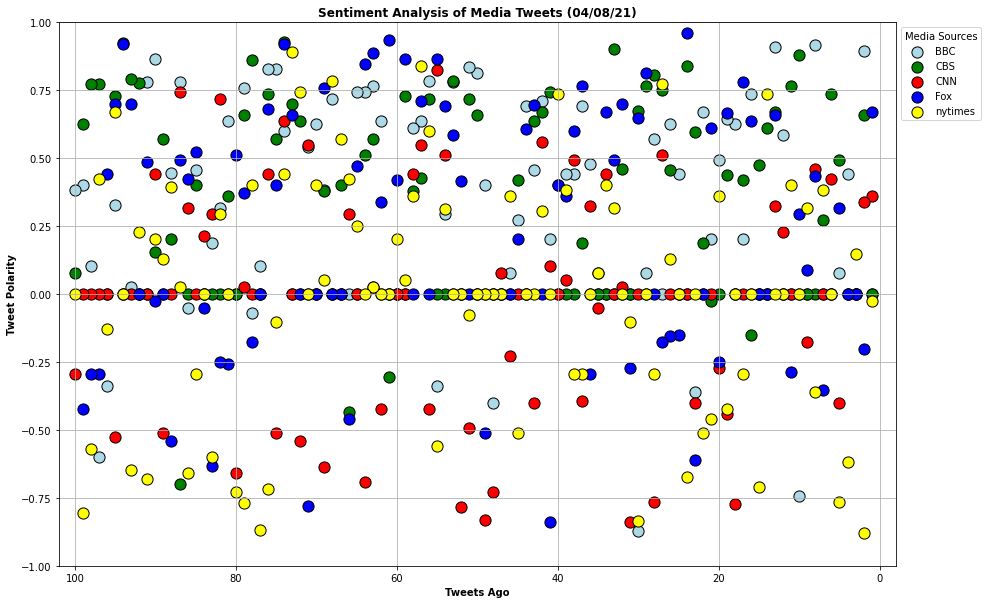

In [8]:
# Build the scatter plots for each media source 
plt.figure(figsize = (15,10))

for targets in colors.keys():
    Plot_DF = sentiments_df[sentiments_df['Media Source'] == targets] 
    plt.scatter(Plot_DF["Tweet Count"],
                Plot_DF["Compound"], 
                label = targets, color = colors[targets],
                edgecolor = "black", s=125)
    
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    

# Incorporate the other graph properties
plt.xlabel("Tweets Ago",fontweight='bold')
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")),fontweight='bold')
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
plt.grid(True)


# Save the figure
plt.savefig("SentimentAnalysis.png")

# Show plot
plt.show()

In [9]:
#Mean scores by organization
scoresbyorganization = sentiments_csv.groupby("Media Source")["Compound"].mean()
scoresbyorganization 

Media Source
BBC        0.293364
CBS        0.324081
CNN       -0.014554
Fox        0.220885
nytimes   -0.007268
Name: Compound, dtype: float64

In [10]:
x_axis = np.arange(len(scoresbyorganization))

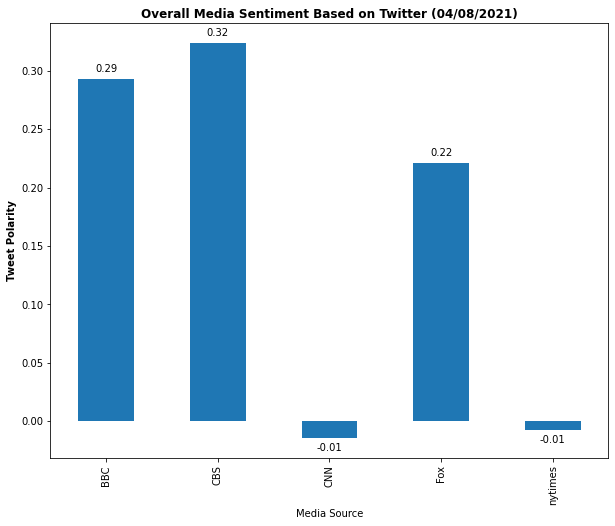

In [11]:
# Build the bar chart for each media source 
plt.figure(figsize = (10,8))

ax = scoresbyorganization.plot(kind='bar')
ax.set_title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
ax.set_ylabel("Tweet Polarity",fontweight='bold')
ax.set_xticklabels(["BBC", "CBS", "CNN", "Fox", "nytimes"])

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x()+rect.get_width()/2
    space = 5
    if y_value < 0:
        space *= -3
        va = "top"
    label = "{:.2f}".format(y_value)
    plt.annotate(label,(x_value,y_value),xytext=(0, space),textcoords="offset points",ha="center",va='bottom')

# Save the figure
plt.savefig('Overall Media Sentiment Based on Twitter.png')

# Show plot
plt.show()